In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install python-mnist
import tensorflow as tf
import numpy as np
from mnist import MNIST

mndata = MNIST('data')
X_train, y_train = mndata.load('/content/gdrive/My Drive/Colab Notebooks/emnist-balanced-train-images-idx3-ubyte',
                               '/content/gdrive/My Drive/Colab Notebooks/emnist-balanced-train-labels-idx1-ubyte')
X_test, y_test = mndata.load('/content/gdrive/My Drive/Colab Notebooks/emnist-balanced-test-images-idx3-ubyte',
                             '/content/gdrive/My Drive/Colab Notebooks/emnist-balanced-test-labels-idx1-ubyte')
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)
X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

<function matplotlib.pyplot.show>

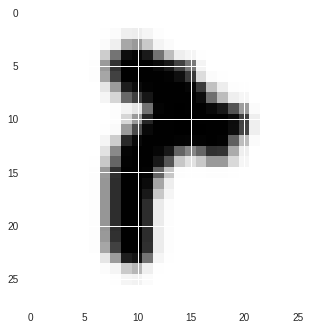

In [0]:
from matplotlib import pyplot as plt

plt.imshow(X_train[0])
plt.show

In [0]:
m = X_train[2]
print(m)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.01568627 0.01568627
  0.01176471 0.01176471 0.01176471 0.01568627 0.01568627 0.01568627
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.03529412 0.1254902  0.14509804 0.14509804 0.14509804
  0.14509804 0.14509804 0.14509804 0.2        0.44705882 0.49019608
  0.37254902 0.40784314 0.37254902 0.49019608 0.49803922 0.44705882
  0.17647059 0.01960784 0.         0.        ]
 [0.         0.         0.         0.         0.01568627 0.08627451
  0.32156863 0.54509804 0.8    

Rotated and reversed test and train images!


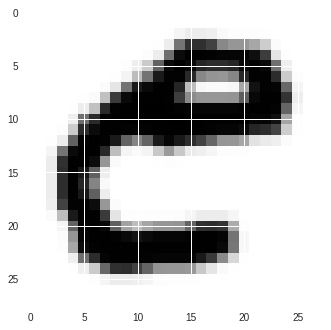

In [0]:
for t in range(112800):
    X_train[t]=np.transpose(X_train[t])
    
plt.imshow(X_train[0])
plt.show

for t in range(18800):
    X_test[t]=np.transpose(X_test[t])

plt.imshow(X_test[1])
plt.show

print('Rotated and reversed test and train images!')

<function matplotlib.pyplot.show>

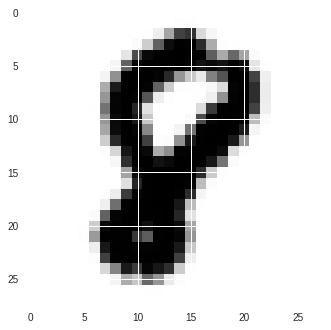

In [0]:
m = X_train[112799]
plt.imshow(m)
plt.show

In [0]:
X_train = X_train.reshape(X_train.shape[0], 784,1)
X_test = X_test.reshape(X_test.shape[0], 784,1)

In [0]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
from keras.constraints import maxnorm
def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)

from keras.utils import np_utils

train_images = X_train.astype('float32')
test_images = X_test.astype('float32')

train_images = resh(train_images)
test_images = resh(test_images)


train_labels = np_utils.to_categorical(y_train, 62)
test_labels = np_utils.to_categorical(y_test, 62)


Using TensorFlow backend.


In [0]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

train_img=train_images 
test_img=test_images
train_lbl=train_labels
test_lbl=test_labels
print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)



(112800, 784)
(112800, 62)
(18800, 784)
(18800, 62)


In [0]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(train_img)
pca.n_components_
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)


In [0]:


K.set_learning_phase(1)

model = Sequential()

model.add(Reshape((28,28,1), input_shape=(784,)))


model.add(Convolution2D(64, (5,5), input_shape=(28,28,1),activation='relu',data_format = 'channels_first',padding='same',kernel_constraint=maxnorm(3)))
model.add(Convolution2D(64, (5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Convolution2D(128, (5,5),activation='relu'))
model.add(Convolution2D(128, (5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))



model.add(Flatten())

model.add(Dense(8192, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(4096, activation='relu', kernel_constraint=maxnorm(3)))




model.add(Dropout(0.5))

model.add(Dense(62, activation='softmax'))

opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
opt = optimizers.Adadelta()
opt = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
print(model.summary())
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=128, epochs=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 28, 1)         44864     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 12, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 8, 128)        204928    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 4, 128)        409728    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 2, 128)        0         
__________

In [0]:
scores = model.evaluate(train_images,train_labels, verbose = 0)

In [0]:
print("Accuracy:%.2f%%"%(scores[1]*100))


Accuracy:97.30%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


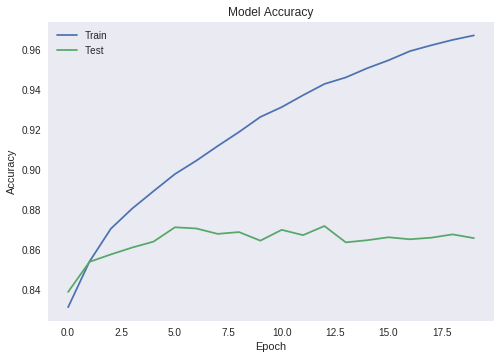

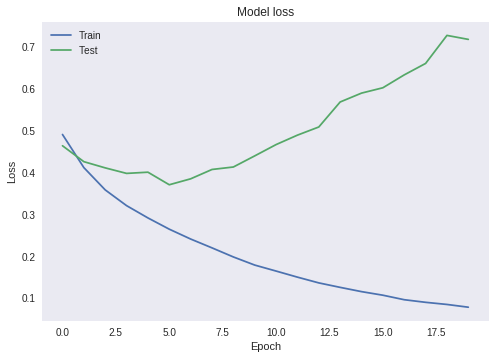

In [0]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

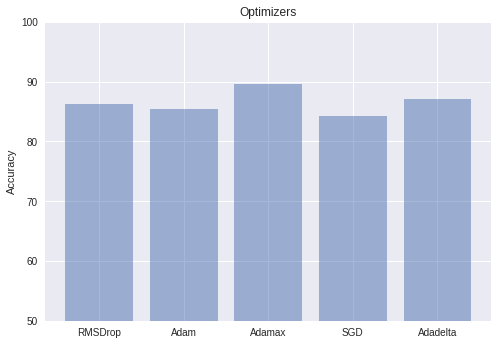

In [0]:
objects = ('RMSDrop', 'Adam', 'Adamax', 'SGD', 'Adadelta')
y_pos = np.arange(len(objects))
performance = [86.2,85.39,89.53,84.29,87.11]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Optimizers')
plt.ylim(50,100)
plt.show()

prediction: [17]


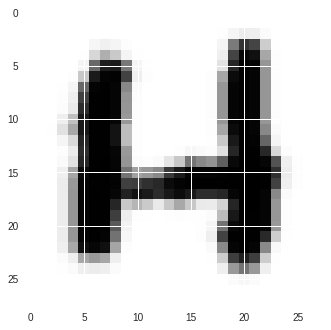

In [0]:
m = X_test[258].reshape(28,28)
plt.imshow(m)
plt.show
print('prediction: '+str(model.predict_classes(X_test[258].reshape(1,784))))

In [0]:
from keras.models import load_model
from keras.models import model_from_json

model_json = model.to_json()
with open("emnistmodel1.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("emnistmodel1.h5")


In [0]:
import os
import shutil

shutil.move("/content/emnistmodel1.h5", "/content/gdrive/My Drive/Colab Notebooks/newemnistmodel124.h5")
shutil.move("/content/emnistmodel1.json", "/content/gdrive/My Drive/Colab Notebooks/newemnistmodel124.json")


'/content/gdrive/My Drive/Colab Notebooks/newemnistmodel124.json'